# Mosaicing

Le but de ce notebbok est de partir d'une image et la couper en plusieurs morceaux qui se recoupent afin de pourvoir, dans une autre partie, trouver un algorithme qui pourra les rassembler.

In [1]:
# Import
import nbimporter
from utils import pansharpening as utils

import matplotlib.pyplot as plt
import cv2

In [2]:
PATH = "../images/our-images/"

In [3]:
def load_image(name):
    path = PATH + name
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize = (13, 13))
    plt.imshow(img)
    
    return img

770 1200 3


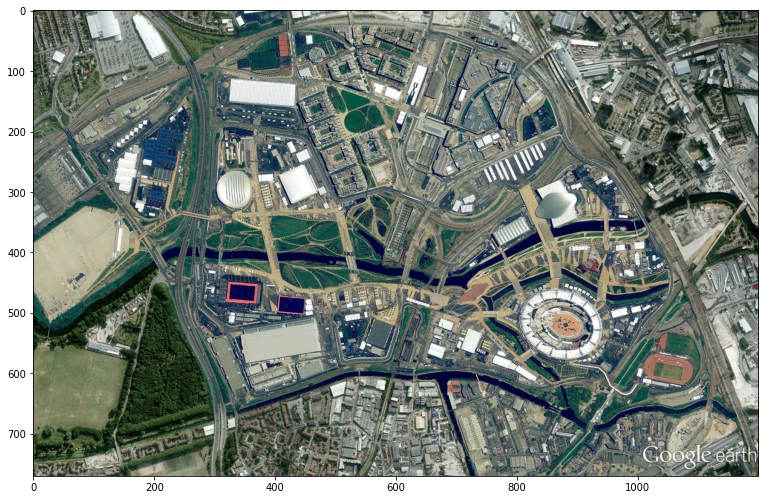

In [4]:
def create_cutout_image(samples=2, covering=0.3):
    ref = load_image("olympic-park.jpeg")
    cropped = []
    height, width, channels = ref.shape
    print(height, width, channels)
    
    new_width = width / 2 + ((width / 2) * covering) / 2
    covering *= new_width
    
    cropped.append(ref[:,0:int(new_width)])
    cropped.append(ref[:,int(width - new_width):])
    
    """
    print(cropped[0].shape)
    print(cropped[1].shape)
    print(new_width)
    """
    
    return cropped
cropped = create_cutout_image()

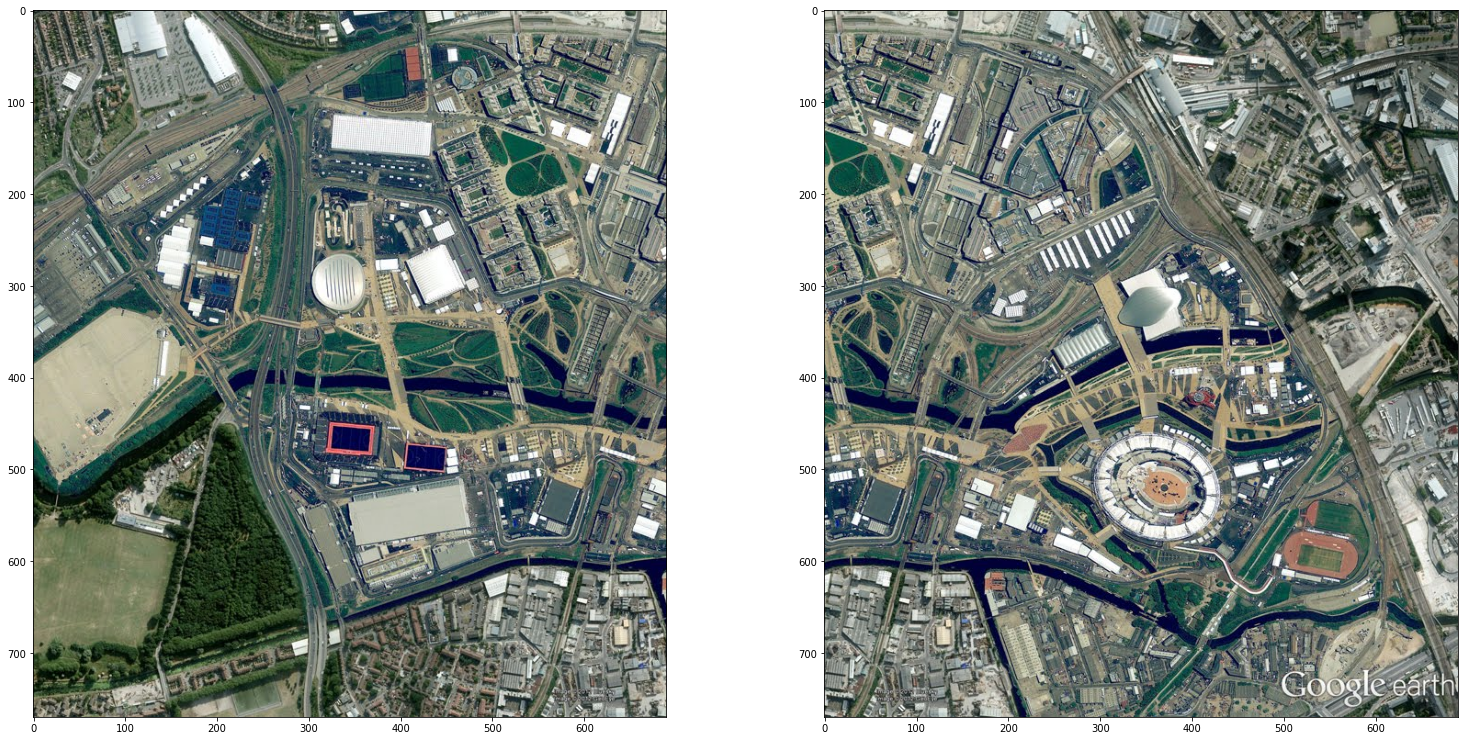

In [5]:
utils.plot_list(cropped)

In [6]:
def save_images_list(images, ext="jpg"):
    for i in range (len(images)):
        img = images[i]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(PATH + "cropped" + str(i) + "." + ext, img)

In [7]:
save_images_list(cropped, "jpeg")